In [1]:
import pandas as pd
import pickle
import dask.dataframe as dd

df = dd.read_csv("../Dataset1/*").compute()

# df = pd.read_csv("/content/drive/My Drive/Year4Project/*")

X = df.iloc[:,:400]
Y = df.iloc[:,400:]

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.5, random_state = 42)

In [7]:
from keras.models import load_model
import pickle

model = load_model('../Models/NN42.h5')

svr_gs = pickle.load(open('../Models/SVR42.pkl', 'rb'))

rf_gs = pickle.load(open('../Models/RF42.pkl', 'rb'))

In [8]:
from sklearn.metrics import max_error, mean_squared_error
import time

start = time.time()
print('Random Forest Test Error is {0:.5g}'.format(mean_squared_error(rf_gs.predict(x_test), y_test)))
end = time.time()
print('And took {0:.3g} seconds to evaluate the test dataset'.format(end-start))

start = time.time()
print('SVR Test Error is {0:.5g}'.format(mean_squared_error(svr_gs.predict(x_test), y_test)))
end = time.time()
print('And took {0:.3g} seconds to evaluate the test dataset'.format(end-start))

start = time.time()
print('NN Test Error is {0:.5g}'.format(mean_squared_error(model.predict(x_test), y_test)))
end = time.time()
print('And took {0:.3g} seconds to evaluate the test dataset'.format(end-start))


Random Forest Test Error is 0.0014139
And took 0.462 seconds to evaluate the test dataset
SVR Test Error is 0.00070815
And took 7.9 seconds to evaluate the test dataset
NN Test Error is 4.174e-06
And took 0.199 seconds to evaluate the test dataset


In [10]:
import numpy as np

data = [y_test.values, rf_gs.predict(x_test), svr_gs.predict(x_test), model.predict(x_test)]

columns = ['exact_1', 'exact_2', 'exact_3', 'rf_1', 'rf_2', 'rf_3', 'svr_1', 'svr_2', 'svr_3', 'nn_1', 'nn_2', 'nn_3']
df1 = pd.concat([pd.DataFrame(i) for i in data], axis=1)
df1.columns = columns

df1['rf_1_err'] = (df1['rf_1'] - df1['exact_1']).abs()
df1['rf_2_err'] = (df1['rf_2'] - df1['exact_2']).abs()
df1['rf_3_err'] = (df1['rf_3'] - df1['exact_3']).abs()

df1['svr_1_err'] = (df1['svr_1'] - df1['exact_1']).abs()
df1['svr_2_err'] = (df1['svr_2'] - df1['exact_2']).abs()
df1['svr_3_err'] = (df1['svr_3'] - df1['exact_3']).abs()

df1['nn_1_err'] = (df1['nn_1'] - df1['exact_1']).abs()
df1['nn_2_err'] = (df1['nn_2'] - df1['exact_2']).abs()
df1['nn_3_err'] = (df1['nn_3'] - df1['exact_3']).abs()


df1['rf_err2'] = np.linalg.norm(df1[['rf_1', 'rf_2', 'rf_3']].values - df1[['exact_1', 'exact_2', 'exact_3']].values, axis=1)
df1['svr_err2'] = np.linalg.norm(df1[['svr_1', 'svr_2', 'svr_3']].values - df1[['exact_1', 'exact_2', 'exact_3']].values, axis=1)
df1['nn_err2'] = np.linalg.norm(df1[['nn_1', 'nn_2', 'nn_3']].values - df1[['exact_1', 'exact_2', 'exact_3']].values, axis=1)

df1['rf_errinf'] = np.linalg.norm(df1[['rf_1', 'rf_2', 'rf_3']].values - df1[['exact_1', 'exact_2', 'exact_3']].values, axis=1, ord=np.inf)
df1['svr_errinf'] = np.linalg.norm(df1[['svr_1', 'svr_2', 'svr_3']].values - df1[['exact_1', 'exact_2', 'exact_3']].values, axis=1, ord=np.inf)
df1['nn_errinf'] = np.linalg.norm(df1[['nn_1', 'nn_2', 'nn_3']].values - df1[['exact_1', 'exact_2', 'exact_3']].values, axis=1, ord=np.inf)


df1.to_csv('../ML_results.csv')
df1.describe()


exact_1      exact_2      exact_3         rf_1         rf_2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      1.498782     1.502443     1.498650     1.498366     1.505372   
std       0.286616     0.289209     0.287955     0.283318     0.272887   
min       1.000039     1.000378     1.001291     1.011226     1.022251   
25%       1.253317     1.258074     1.253138     1.251015     1.263701   
50%       1.497411     1.499383     1.493989     1.500206     1.504226   
75%       1.745962     1.748390     1.748747     1.745447     1.746445   
max       1.999929     1.999924     1.999743     1.987880     1.967463   

              rf_3        svr_1        svr_2        svr_3         nn_1  ...  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  ...   
mean      1.495790     1.497767     1.502512     1.499788     1.498419  ...   
std       0.276554     0.278307     0.280772     0.277957     0.286740  ...   
min       1.016337     0.995354     0.992564     1.004736     0.997822  ...   
25%       1.252039     1.261070     1.261428     1.257378     1.252836  ...   
50%       1.493437     1.505451     1.496968     1.492695     1.496590  ...   
75%       1.742725     1.735227     1.748177     1.742072     1.746170  ...   
max       1.988544     2.018205     2.000475     1.991462     2.007056  ...   

         svr_3_err      nn_1_err      nn_2_err      nn_3_err      rf_err2  \
count  5000.000000  5.000000e+03  5.000000e+03  5.000000e+03  5000.000000   
mean      0.015634  1.273716e-03  1.555433e-03  1.680156e-03     0.050254   
std       0.023841  1.067966e-03  1.409739e-03  1.590805e-03     0.041430   
min       0.000003  4.590552e-07  2.532185e-07  1.578303e-07     0.001916   
25%       0.004327  4.771545e-04  5.515809e-04  6.197132e-04     0.022817   
50%       0.008769  9.907327e-04  1.215740e-03  1.326143e-03     0.038561   
75%       0.016339  1.790560e-03  2.128239e-03  2.328812e-03     0.063663   
max       0.334100  8.717820e-03  1.506632e-02  3.182017e-02     0.423051   

          svr_err2      nn_err2    rf_errinf   svr_errinf    nn_errinf  
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
mean      0.027211     0.003019     0.042725     0.021007     0.002524  
std       0.037206     0.001845     0.035016     0.027561     0.001614  
min       0.000805     0.000180     0.001253     0.000626     0.000153  
25%       0.010774     0.001829     0.019002     0.008541     0.001505  
50%       0.015510     0.002693     0.033026     0.011958     0.002234  
75%       0.027495     0.003811     0.054448     0.021274     0.003196  
max       0.537710     0.034821     0.349506     0.385641     0.031820  

[8 rows x 27 columns]

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [12]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
from numpy import sin, cos, pi
from plotly.subplots import make_subplots
from decimal import *
import numpy as np


# some math: generate points on the surface of ellipsoid

index = np.random.randint(0,5000)

phi = np.linspace(0, 2*pi, )
theta = np.linspace(-pi/2, pi/2, )
phi, theta=np.meshgrid(phi, theta)

x_exact = cos(theta) * sin(phi) * df1['exact_1'][index]
y_exact = cos(theta) * cos(phi) * df1['exact_2'][index]
z_exact = sin(theta) * df1['exact_3'][index]

x_rf = cos(theta) * sin(phi) * df1['rf_1'][index]
y_rf = cos(theta) * cos(phi) * df1['rf_2'][index]
z_rf = sin(theta) * df1['rf_3'][index]

x_svr = cos(theta) * sin(phi) * df1['svr_1'][index]
y_svr = cos(theta) * cos(phi) * df1['svr_2'][index]
z_svr = sin(theta) * df1['svr_3'][index]

x_nn = cos(theta) * sin(phi) * df1['nn_1'][index]
y_nn = cos(theta) * cos(phi) * df1['nn_2'][index]
z_nn = sin(theta) * df1['nn_3'][index]

fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
    subplot_titles=("Random Forest ({0:.3E})".format(Decimal(df1['rf_err2'][index]**2)), "SVR ({0:.3E})".format(Decimal(df1['svr_err2'][index]**2)), "Neural Network ({0:.3E})".format(Decimal(df1['nn_err2'][index]**2))))

exact = go.Mesh3d({     
    'x': x_exact.flatten(), 
    'y': y_exact.flatten(), 
    'z': z_exact.flatten(),
    'color':'green',
    'alphahull': 0,
    'opacity':0.3,
    'name':'exact'
})

# fig.add_trace(exact, row=1, col=1)
# fig.add_trace(exact, row=1, col=2)
# fig.add_trace(exact, row=1, col=3)

svr_intensity = np.log(((x_exact.flatten()-x_svr.flatten())**2+ (y_exact.flatten()-y_svr.flatten())**2 + (z_exact.flatten()-z_svr.flatten())**2)**0.5)

svr = go.Mesh3d({     
    'x': x_svr.flatten(), 
    'y': y_svr.flatten(), 
    'z': z_svr.flatten(), 
    'alphahull': 0,
    'name':'svr',
    'opacity':0.5,
    'coloraxis' : "coloraxis",
    'hovertext':svr_intensity,
    'hoverinfo':'name + text',
    'intensity' : svr_intensity,
})

fig.add_trace(svr, row=1, col=2)

rf_intensity = np.log(((x_exact.flatten()-x_rf.flatten())**2+ (y_exact.flatten()-y_rf.flatten())**2 + (z_exact.flatten()-z_rf.flatten())**2)**0.5)

rf = go.Mesh3d({     
    'x': x_rf.flatten(), 
    'y': y_rf.flatten(), 
    'z': z_rf.flatten(), 
    'alphahull': 0,
    'name':'rf',
    'intensity' : rf_intensity,
    'opacity':0.5,
    'coloraxis' : "coloraxis",
    'hovertext': rf_intensity,
    'hoverinfo':'name + text'
})

fig.add_trace(rf, row=1, col=1)

nn_intensity = np.log(((x_exact.flatten()-x_nn.flatten())**2+ (y_exact.flatten()-y_nn.flatten())**2 + (z_exact.flatten()-z_nn.flatten())**2)**0.5)

nn = go.Mesh3d({     
    'x': x_nn.flatten(), 
    'y': y_nn.flatten(), 
    'z': z_nn.flatten(), 
    'alphahull': 0,
    'intensity' : nn_intensity,
    'name':'nn',
    'opacity':0.5,
    'coloraxis' : "coloraxis",
    'hovertext':nn_intensity,
    'hoverinfo':'name + text'
})

fig.update_layout(coloraxis = {'colorscale':'Magma'})

fig.update_layout(title_text="Object %d" % index)
                  
fig.add_trace(nn, row=1, col=3)

iplot(fig)

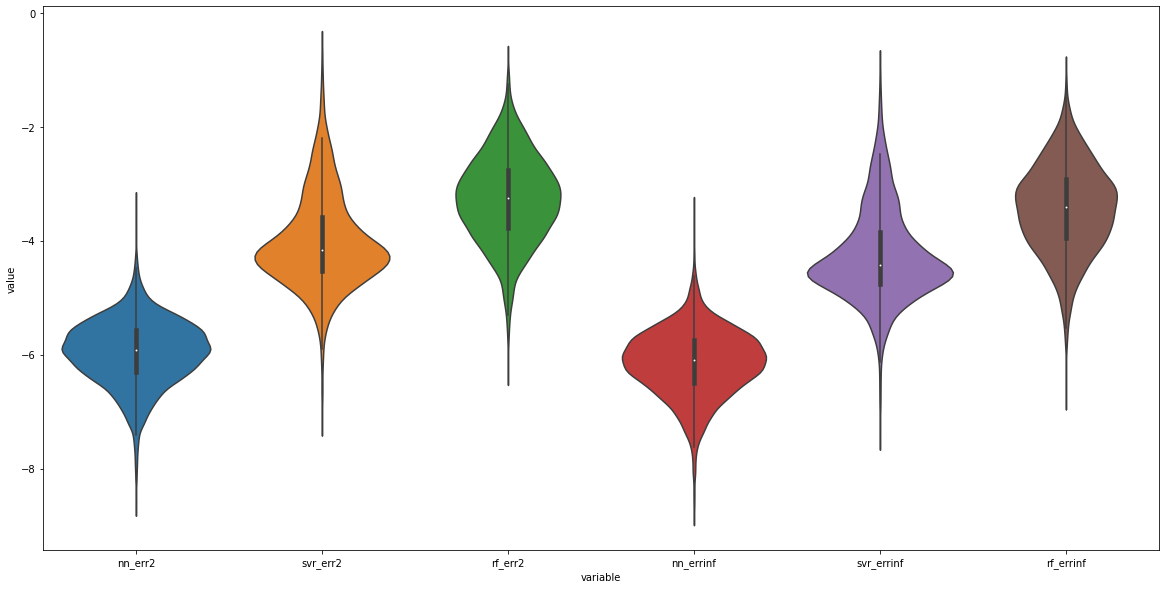

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

sns.violinplot(x='variable', y='value', data=df1[['nn_err2', 'svr_err2', 'rf_err2','nn_errinf', 'svr_errinf', 'rf_errinf']].apply(lambda x: np.log(x)).melt())

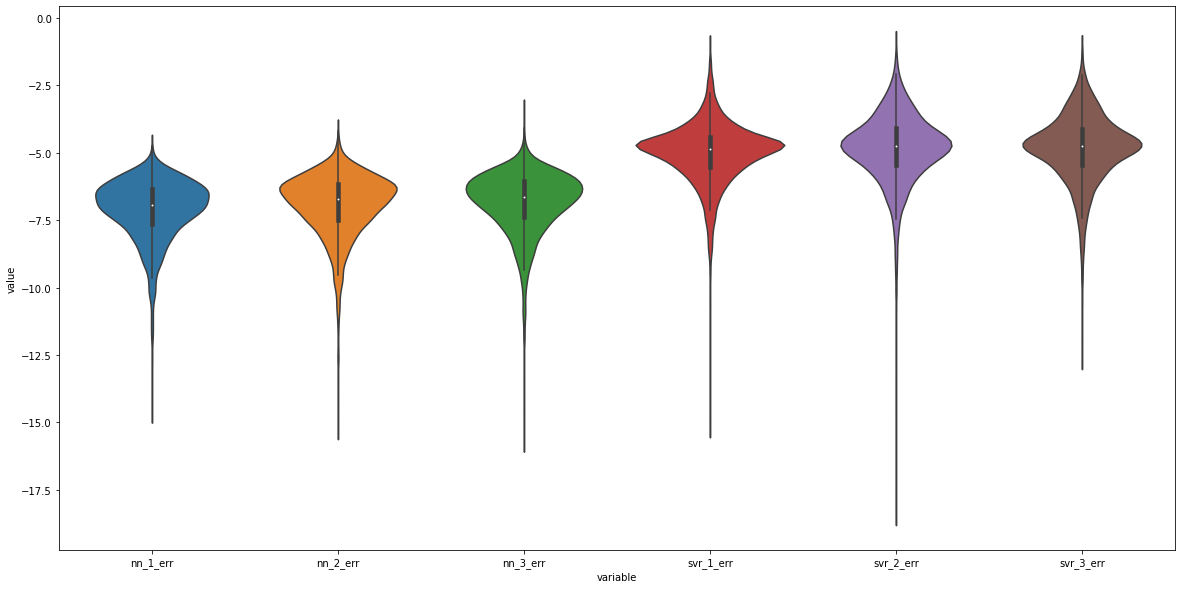

In [14]:
plt.figure(figsize=(20, 10))

sns.violinplot(x='variable', y='value', data=df1[['nn_1_err', 'nn_2_err', 'nn_3_err', 'svr_1_err', 'svr_2_err', 'svr_3_err']].apply(lambda x: np.log(x)).melt());

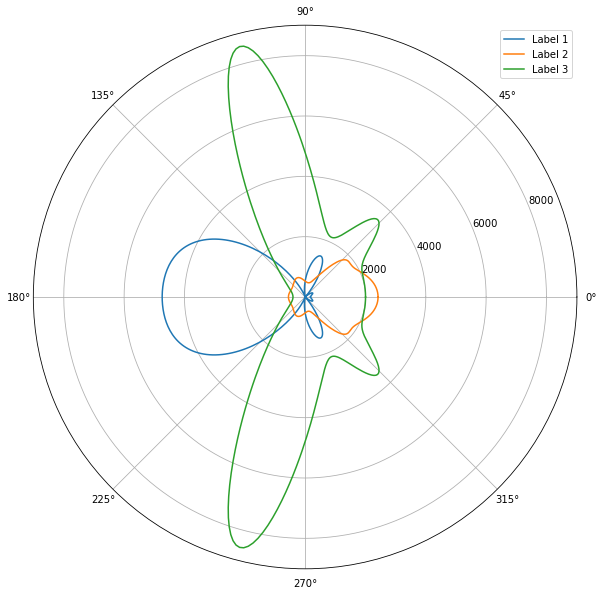

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#The F-Score is calculated using the variance 
#between the features and the variance within each feature.'

plt.figure(figsize=(10, 10))

selector = SelectKBest(f_regression, k=10)
selector.fit_transform(x_train, y_train['label_1'])
label1_f = selector.scores_

selector.fit_transform(x_train, y_train['label_2'])
label2_f = selector.scores_

selector.fit_transform(x_train, y_train['label_3'])
label3_f = selector.scores_

plt.polar(np.linspace(0,2*np.pi, 400), label1_f, label='Label 1')
plt.polar(np.linspace(0,2*np.pi, 400), label2_f, label='Label 2')
plt.polar(np.linspace(0,2*np.pi, 400), label3_f, label='Label 3')
plt.legend()
plt.show()

In [17]:
print("The Neural Network performs best on {0:.4g}% of the test dataset".format(df1[(df1['nn_err2']<df1['svr_err2'])&(df1['nn_err2']<df1['rf_err2'])].shape[0]/50))

print("The SVR performs better than the Random Forest on {0:.4g}% of the test dataset".format(df1[df1['svr_err2']<df1['rf_err2']].shape[0]/50))




The Neural Network performs best on 98.68% of the test dataset
The SVR performs better than the Random Forest on 81.78% of the test dataset


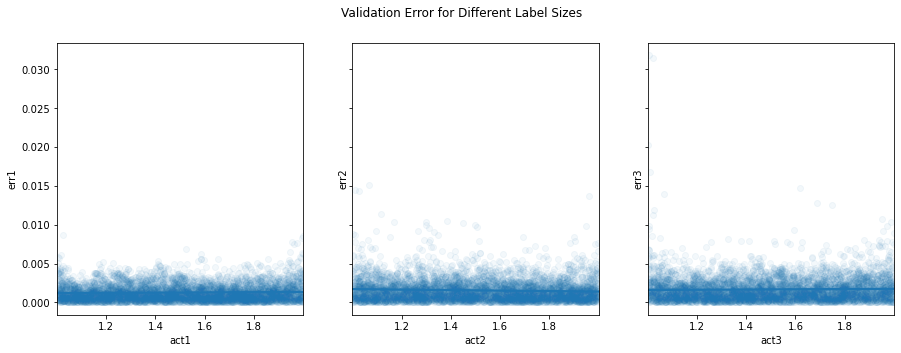

In [18]:
df2 = pd.concat([pd.DataFrame(model.predict(x_test)), pd.DataFrame(y_test.values)], axis=1)
df2.columns = ['pred1', 'pred2', 'pred3', 'act1', 'act2', 'act3']

df2['err1'] = (df2['pred1'] - df2['act1']).abs()
df2['err2'] = (df2['pred2'] - df2['act2']).abs()
df2['err3'] = (df2['pred3'] - df2['act3']).abs()

fig, ax = plt.subplots(ncols=3, figsize=(15,5), sharey=True)
sns.regplot(x = df2['act1'], y = df2['err1'], ax=ax[0], scatter_kws={'alpha':0.05})
sns.regplot(x = df2['act2'], y = df2['err2'], ax=ax[1], scatter_kws={'alpha':0.05})
sns.regplot(x = df2['act3'], y = df2['err3'], ax=ax[2], scatter_kws={'alpha':0.05})
fig.suptitle('Validation Error for Different Label Sizes')
plt.show()


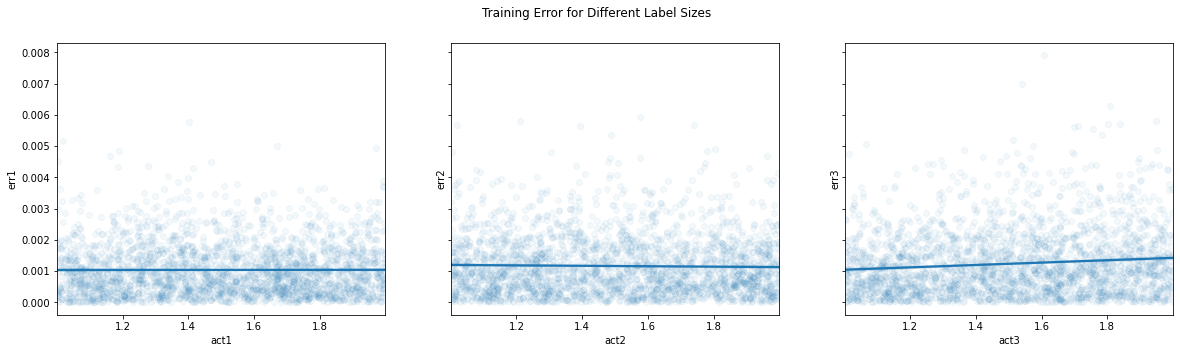

In [19]:
df2 = pd.concat([pd.DataFrame(model.predict(x_train)), pd.DataFrame(y_train.values)], axis=1)
df2.columns = ['pred1', 'pred2', 'pred3', 'act1', 'act2', 'act3']

df2['err1'] = (df2['pred1'] - df2['act1']).abs()
df2['err2'] = (df2['pred2'] - df2['act2']).abs()
df2['err3'] = (df2['pred3'] - df2['act3']).abs()

fig, ax = plt.subplots(ncols=3, figsize=(20,5), sharey=True)
sns.regplot(x = df2['act1'], y = df2['err1'], ax=ax[0], scatter_kws={'alpha':0.05})
sns.regplot(x = df2['act2'], y = df2['err2'], ax=ax[1], scatter_kws={'alpha':0.05})
sns.regplot(x = df2['act3'], y = df2['err3'], ax=ax[2], scatter_kws={'alpha':0.05})
fig.suptitle('Training Error for Different Label Sizes')
plt.show()
